In [2]:
# importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# importing the actual dataset with no missing data
iris_df = pd.read_csv('iris.csv')

# importing the dataset with 10% missing values
df=pd.read_csv('iris.mis10.csv')

# column 1 was not useful. Removed it.
del df['Unnamed: 0']

# creating a copy of df with no missing values
df_new = df.dropna().copy()

In [3]:
# encoding the class into value between range 1 to n-1
from sklearn.preprocessing import LabelEncoder
# fitting the label encoder
encoder_obj = LabelEncoder()
df_new['C'] = encoder_obj.fit_transform(df_new['C'])

missing_SL = df[df['SL'].isna()].dropna(thresh=4)
missing_SW = df[df['SW'].isna()].dropna(thresh=4)
missing_PL = df[df['PL'].isna()].dropna(thresh=4)
missing_PW = df[df['PW'].isna()].dropna(thresh=4)

missing_SL['C'] = encoder_obj.transform(missing_SL['C'])
missing_SW['C'] = encoder_obj.transform(missing_SW['C'])
missing_PL['C'] = encoder_obj.transform(missing_PL['C'])
missing_PW['C'] = encoder_obj.transform(missing_PW['C'])

In [4]:
from sklearn.neighbors import KNeighborsRegressor

In [5]:
# to impute the values for feature (SL), train the KNN model using SW, PL, PW as feature set

In [38]:
knn_model = KNeighborsRegressor(n_neighbors=5, weights='uniform', algorithm='brute')

In [39]:
df_new.head()

,SL,SW,PL,PW,C
0,5.1,3.5,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
4,5.0,3.6,1.4,0.2,0
6,4.6,3.4,1.4,0.3,0
9,4.9,3.1,1.5,0.1,0


In [40]:
knn_model.fit(df_new.iloc[:,1:],df_new.iloc[:,[0]])

KNeighborsRegressor(algorithm='brute', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')

In [41]:
iris_df.iloc[missing_SL.index.values,:]

,SL,SW,PL,PW,C
5,5.4,3.9,1.7,0.4,Iris-setosa
11,4.8,3.4,1.6,0.2,Iris-setosa
35,5.0,3.2,1.2,0.2,Iris-setosa
41,4.5,2.3,1.3,0.3,Iris-setosa
82,5.8,2.7,3.9,1.2,Iris-versicolor
109,7.2,3.6,6.1,2.5,Iris-virginica
128,6.4,2.8,5.6,2.1,Iris-virginica
129,7.2,3.0,5.8,1.6,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica


In [42]:
vals = knn_model.predict(missing_SL.iloc[:,1:]).reshape(9)

In [43]:
vals

array([5.28, 5.  , 4.62, 4.76, 5.62, 6.74, 6.72, 6.74, 6.38])

In [44]:
%matplotlib notebook

<IPython.core.display.Javascript object>


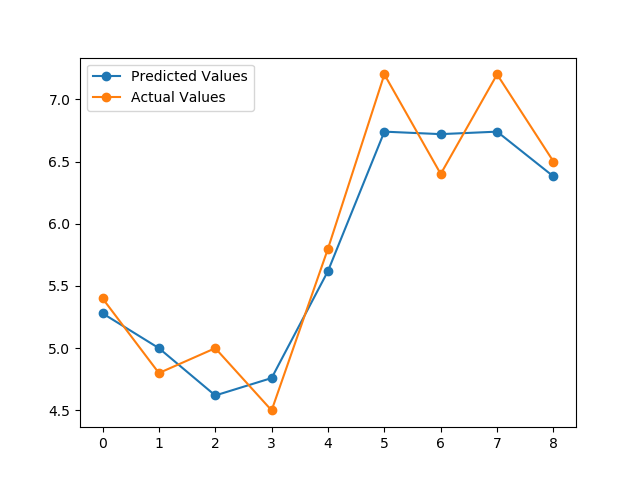

In [46]:
plt.figure()
plt.plot(np.arange(len(vals)),vals, '-o',label='Predicted Values')
plt.plot(np.arange(len(vals)),iris_df.iloc[missing_SL.index,[0]].values, '-o',label = 'Actual Values')
plt.legend()
plt.show()